In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

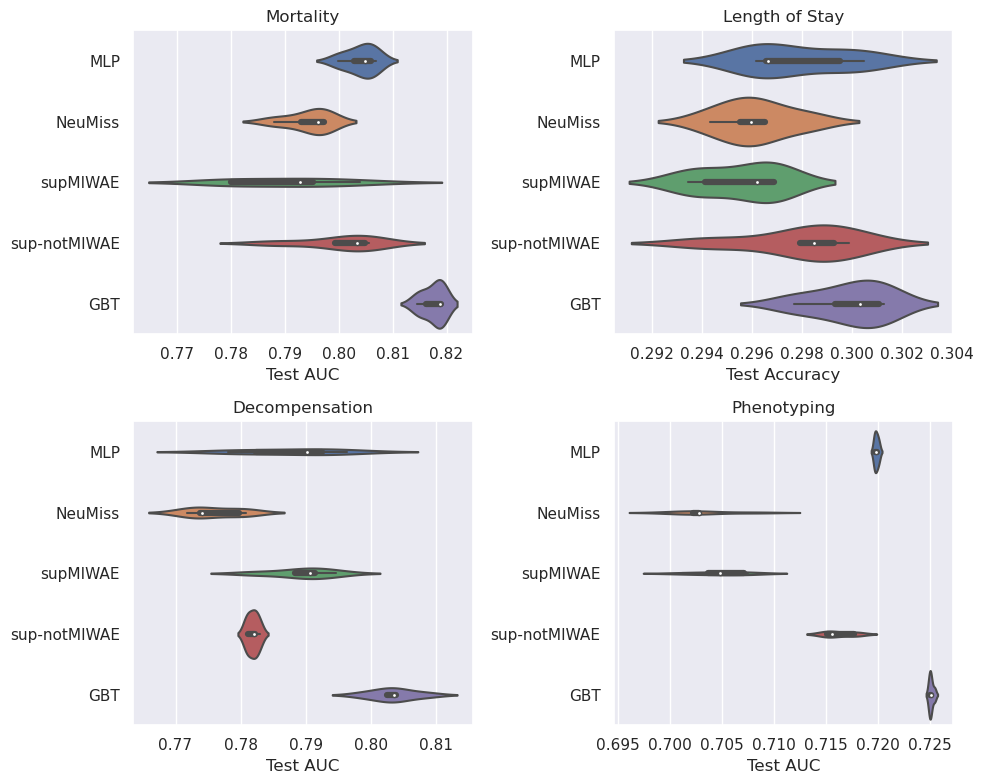

In [8]:
tasks = ["mortality", "los", "decomp", "phenotyping"]
# tasks = ["mortality", "los"]
task_names = {
    "mortality": "Mortality",
    "los": "Length of Stay",
    "decomp": "Decompensation",
    "phenotyping": "Phenotyping",
}
model_names = {
    "mlp": "MLP",
    "neumiss": "NeuMiss",
    "supmiwae": "supMIWAE",
    "supnotmiwae": "sup-notMIWAE",
    "gbt": "GBT"
}
    

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, task in zip(axes.flatten(), tasks):
    data = pd.read_csv(f"results/{task}.csv")
    data["model"] = data["model"].replace(model_names)
    sns.violinplot(
        ax=ax, 
        data=data, 
        y="model", 
        x="score",
        order=[
            "MLP",
            "NeuMiss",
            "supMIWAE",
            "sup-notMIWAE",
            "GBT",
        ],
    )
    ax.set_ylabel("")
    
    score = "Accuracy" if task == "los" else "AUC"
    ax.set_xlabel(f"Test {score}")
    ax.set_title(task_names[task])
    
plt.tight_layout()
plt.savefig("model_results.pdf")